In [37]:
from textblob  import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [11]:
df = pd.read_csv('../data/training.1600000.processed.noemoticon.csv',encoding='latin1')
df.head()



,uno,dos,tres,cuatro,cinco
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [12]:
df.describe()

,uno
count,1.600000e+06
mean,1.998818e+09
std,1.935761e+08
min,1.467810e+09
25%,1.956916e+09
50%,2.002102e+09
75%,2.177059e+09
max,2.329206e+09


In [13]:
df.isnull().sum()

uno       0
dos       0
tres      0
cuatro    0
cinco     0
dtype: int64

In [14]:
df.dropna()

,uno,dos,tres,cuatro,cinco
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...
4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [15]:
df_duplicate = df.drop_duplicates()

In [16]:
df

,uno,dos,tres,cuatro,cinco
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...
4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [17]:
df['cinco'] = df['cinco'].str.replace(r'[@]','',regex=True)
#df['cinco'] = df['cinco'].str.replace(r"[http://\.com.co]",'')


In [18]:
df

,uno,dos,tres,cuatro,cinco
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"switchfoot http://twitpic.com/2y1zl - Awww, th..."
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,Kenichan I dived many times for the ball. Mana...
0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"nationwideclass no, it's not behaving at all. ..."
...,...,...,...,...,...
4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [19]:
df['cinco'] = df['cinco'].str.lower()

df

,uno,dos,tres,cuatro,cinco
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"switchfoot http://twitpic.com/2y1zl - awww, th..."
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his facebook by ...
0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan i dived many times for the ball. mana...
0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"nationwideclass no, it's not behaving at all. ..."
...,...,...,...,...,...
4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,just woke up. having no school is the best fee...
4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdb.com - very cool to hear old walt interv...
4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,are you ready for your mojo makeover? ask me f...
4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy 38th birthday to my boo of alll time!!! ...


In [20]:
prueba_testeo = TextBlob("im very happy")
prueba_testeo.sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

In [21]:
with open('../data/testblob.txt','w') as file:
    for i in df['cinco']:
        testeo = TextBlob(i)
        text = testeo.sentiment.polarity 
        if text >= 1.0:
            sentimiento = 'positivo'
        elif text <= 0.0:
            sentimiento = 'negativo'
        else:
            sentimiento ='neutro'

       
        file.write(f'{sentimiento}\n')
        #print(sentimiento)
                
        

# VADER

In [22]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/angie/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [23]:
with open('../data/vader.txt','w') as file:
    analizer = SentimentIntensityAnalyzer()
    for i in df['cinco']:
        data = analizer.polarity_scores(i)

        compound = data['compound']

        if compound >= 0.5:
            polaridad = 'positivo'
        elif compound <= 0.05:
            polaridad = 'Negativo'
        else:
            polaridad = 'neutro'

        file.write(f'{polaridad}\n')

# dataframe


In [98]:
resultado = []
resultado = {
    'original': df['cinco'],
    'textblob':text,
    'vader':compound,

}


In [99]:
datos = pd.DataFrame(resultado)
datos

,original,textblob,vader
0,"switchfoot http://twitpic.com/2y1zl - awww, th...",0.8,0.5719
0,is upset that he can't update his facebook by ...,0.8,0.5719
0,kenichan i dived many times for the ball. mana...,0.8,0.5719
0,my whole body feels itchy and like its on fire,0.8,0.5719
0,"nationwideclass no, it's not behaving at all. ...",0.8,0.5719
...,...,...,...
4,just woke up. having no school is the best fee...,0.8,0.5719
4,thewdb.com - very cool to hear old walt interv...,0.8,0.5719
4,are you ready for your mojo makeover? ask me f...,0.8,0.5719
4,happy 38th birthday to my boo of alll time!!! ...,0.8,0.5719


In [ ]:
import numpy as np

x = datos['textblob'].sum()
y = datos['vader'].sum()



np.float64(1280000.0)

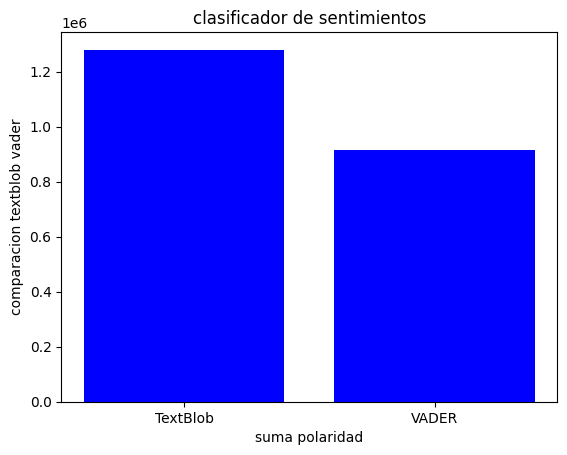

In [100]:
metodo = ['TextBlob','VADER']
valores = [x,y]

plt.bar(metodo,valores,color='blue')
plt.title("clasificador de sentimientos")
plt.xlabel("suma polaridad")
plt.ylabel("comparacion textblob vader")
plt.grid(False)
plt.show()